# 환경 관련 데이터 분석하기

## 데이터 수집

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# dust.xlsx 불러오기
file_path='/content/drive/MyDrive/dust.xlsx'
dust=pd.read_excel(file_path)
dust.head()

,날짜,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2.5
0,2021-01-01 01,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01 02,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01 03,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01 04,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01 05,0.004,0.5,0.010,0.026,NaN,14.0


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dust.shape

(744, 7)

In [4]:
dust.head()

,날짜,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2.5
0,2021-01-01 01,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01 02,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01 03,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01 04,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01 05,0.004,0.5,0.010,0.026,NaN,14.0


In [5]:
dust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      744 non-null    object 
 1   아황산가스   740 non-null    float64
 2   일산화탄소   740 non-null    float64
 3   오존      740 non-null    float64
 4   이산화질소   740 non-null    float64
 5   PM10    725 non-null    float64
 6   PM2.5   739 non-null    float64
dtypes: float64(6), object(1)
memory usage: 40.8+ KB


In [6]:
dust.describe()

,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2.5
count,740.000000,740.000000,740.000000,740.000000,725.000000,739.000000
mean,0.003654,0.563243,0.014154,0.030422,33.325517,21.833559
std,0.000628,0.164593,0.010689,0.014664,19.930029,12.222892
min,0.002000,0.300000,0.001000,0.006000,3.000000,3.000000
25%,0.003000,0.400000,0.003000,0.017000,20.000000,13.000000
50%,0.004000,0.500000,0.014000,0.030000,29.000000,19.000000
75%,0.004000,0.700000,0.024000,0.043000,43.000000,29.000000
max,0.006000,1.200000,0.037000,0.063000,163.000000,72.000000


In [7]:
# 컬럼의 이름을 영문으로 변경한다.
dust.rename(columns={'날짜':'date','아황산가스':'so2',
                     '일산화탄소':'co','오존':'o3',
                     '이산화질소':'no2'},inplace=True)
dust.head()

,date,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01 01,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01 02,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01 03,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01 04,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01 05,0.004,0.5,0.010,0.026,NaN,14.0


In [8]:
# 날짜 데이터에서 년도-월-일만 추출한다.
dust['date']=dust['date'].str[:11]
dust.head()

,date,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01,0.004,0.5,0.010,0.026,NaN,14.0


In [9]:
dust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    744 non-null    object 
 1   so2     740 non-null    float64
 2   co      740 non-null    float64
 3   o3      740 non-null    float64
 4   no2     740 non-null    float64
 5   PM10    725 non-null    float64
 6   PM2.5   739 non-null    float64
dtypes: float64(6), object(1)
memory usage: 40.8+ KB


In [10]:
dust['date']=pd.to_datetime(dust['date'])
dust.dtypes

date     datetime64[ns]
so2             float64
co              float64
o3              float64
no2             float64
PM10            float64
PM2.5           float64
dtype: object

In [11]:
dust['date']

0     2021-01-01
1     2021-01-01
2     2021-01-01
3     2021-01-01
4     2021-01-01
         ...    
739   2021-01-31
740   2021-01-31
741   2021-01-31
742   2021-01-31
743   2021-01-31
Name: date, Length: 744, dtype: datetime64[ns]

In [12]:
dust['year']=dust['date'].dt.year
dust['month']=dust['date'].dt.month
dust['day']=dust['date'].dt.day
dust.columns

Index(['date', 'so2', 'co', 'o3', 'no2', 'PM10', 'PM2.5', 'year', 'month',
       'day'],
      dtype='object')

In [13]:
# 컬럼 순서 재정렬
dust=dust[['date','year','month','day','so2','co','o3','no2','PM10','PM2.5']]
dust.columns

Index(['date', 'year', 'month', 'day', 'so2', 'co', 'o3', 'no2', 'PM10',
       'PM2.5'],
      dtype='object')

In [14]:
# month,day,hour 컬럼을 int형으로 변환
dust['month']=dust['month'].astype(int)
dust['day']=dust['day'].astype(int)
dust.dtypes

date     datetime64[ns]
year              int64
month             int64
day               int64
so2             float64
co              float64
o3              float64
no2             float64
PM10            float64
PM2.5           float64
dtype: object

In [15]:
dust.shape[0]

744

In [17]:
# 각 컬럼별(변수) 결측치(null) 수 확인 
dust.isnull().sum()
#dust

date      0
year      0
month     0
day       0
so2       4
co        4
o3        4
no2       4
PM10     19
PM2.5     5
dtype: int64

### 시계열 분석이란? 일정한 시간 간격으로 표시된 자료의 특성(추세변동,계절변동,순환변동,불규칙변도)을 파악하여 미래를 예측하는 분석방법이다. 시계열 분석을 통해서 내년도 판매량,다음달 항공기 이용 승객, 앞으로 4개월 동안의 변화, 다음 분기에 예상되는 변화 등을 예측할 수 있다.

In [ ]:
# 시계열분석이므로 null값을 이전 시간의 값을 기준으로 채워줌
# 결측값을 앞 방향 혹은 뒷 방향으로 채우기
dust=dust.fillna(method='pad') 
dust.head()

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01,2021,1,1,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01,2021,1,1,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01,2021,1,1,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01,2021,1,1,0.004,0.5,0.010,0.026,17.0,14.0


In [18]:
# 연습문제1
# 결측값을 다음 데이터로 채우기
dust=dust.fillna(method='bfill') 
dust.head()

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0
1,2021-01-01,2021,1,1,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01,2021,1,1,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01,2021,1,1,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01,2021,1,1,0.004,0.5,0.010,0.026,20.0,14.0


In [19]:
dust.isnull().sum()

date     0
year     0
month    0
day      0
so2      0
co       0
o3       0
no2      0
PM10     0
PM2.5    0
dtype: int64

In [20]:
# 이전값이 없는 경우 혼자Nan은 20으로 채워줌
dust.fillna(20,inplace=True)
dust.head()

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0
1,2021-01-01,2021,1,1,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01,2021,1,1,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01,2021,1,1,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01,2021,1,1,0.004,0.5,0.010,0.026,20.0,14.0


In [21]:
dust.isnull().sum()

date     0
year     0
month    0
day      0
so2      0
co       0
o3       0
no2      0
PM10     0
PM2.5    0
dtype: int64

In [22]:
dust.dtypes

date     datetime64[ns]
year              int64
month             int64
day               int64
so2             float64
co              float64
o3              float64
no2             float64
PM10            float64
PM2.5           float64
dtype: object

## 날씨 데이터 불러오기

In [23]:
file_path='/content/drive/MyDrive/weather.xlsx'
weather=pd.read_excel(file_path)
weather.head()

,지점,지점명,일시,기온(°C),풍속(m/s),강수량(mm),습도(%)
0,400,강남,2021-01-01 01:00:00,-7.2,0.6,0.0,57.5
1,400,강남,2021-01-01 02:00:00,-7.6,0.7,0.0,57.5
2,400,강남,2021-01-01 03:00:00,-8.2,0.6,0.0,62.0
3,400,강남,2021-01-01 04:00:00,-8.1,0.5,0.0,60.5
4,400,강남,2021-01-01 05:00:00,-8.7,1.3,0.0,66.4


In [24]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   지점       743 non-null    int64         
 1   지점명      743 non-null    object        
 2   일시       743 non-null    datetime64[ns]
 3   기온(°C)   743 non-null    float64       
 4   풍속(m/s)  743 non-null    float64       
 5   강수량(mm)  743 non-null    float64       
 6   습도(%)    743 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 40.8+ KB


In [25]:
weather.drop('지점',axis=1,inplace=True)
weather.drop('지점명',axis=1,inplace=True)
weather.head()

,일시,기온(°C),풍속(m/s),강수량(mm),습도(%)
0,2021-01-01 01:00:00,-7.2,0.6,0.0,57.5
1,2021-01-01 02:00:00,-7.6,0.7,0.0,57.5
2,2021-01-01 03:00:00,-8.2,0.6,0.0,62.0
3,2021-01-01 04:00:00,-8.1,0.5,0.0,60.5
4,2021-01-01 05:00:00,-8.7,1.3,0.0,66.4


In [26]:
# 컬럼명변경
weather.columns=['date','temp','wind','rain','humid']
weather.head()
weather.columns

Index(['date', 'temp', 'wind', 'rain', 'humid'], dtype='object')

In [27]:
# 컬럼 일부 데이터(시간) 제거
weather['date'] = pd.to_datetime(weather['date']).dt.date
weather['date']=pd.to_datetime(weather['date'])
weather.info()
weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    743 non-null    datetime64[ns]
 1   temp    743 non-null    float64       
 2   wind    743 non-null    float64       
 3   rain    743 non-null    float64       
 4   humid   743 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 29.1 KB


,date,temp,wind,rain,humid
0,2021-01-01,-7.2,0.6,0.0,57.5
1,2021-01-01,-7.6,0.7,0.0,57.5
2,2021-01-01,-8.2,0.6,0.0,62.0
3,2021-01-01,-8.1,0.5,0.0,60.5
4,2021-01-01,-8.7,1.3,0.0,66.4


In [28]:
# 결측값 확인
weather.isnull().sum()

date     0
temp     0
wind     0
rain     0
humid    0
dtype: int64

In [29]:
weather['rain'].value_counts()

0.0    720
0.5      9
1.0      7
1.5      3
2.5      2
2.0      2
Name: rain, dtype: int64

In [30]:
# 강수량이 0인 값을 0.01로 변환
weather['rain']=weather['rain'].replace([0], 0.01)
weather['rain'].value_counts()

0.01    720
0.50      9
1.00      7
1.50      3
2.50      2
2.00      2
Name: rain, dtype: int64

In [31]:
weather['rain'].value_counts()

0.01    720
0.50      9
1.00      7
1.50      3
2.50      2
2.00      2
Name: rain, dtype: int64

# 데이터 병합하기

In [32]:
dust.shape

(744, 10)

In [33]:
weather.shape

(743, 5)

In [34]:
dust.drop(index=743,inplace=True)
dust.shape

(743, 10)

In [35]:
weather

,date,temp,wind,rain,humid
0,2021-01-01,-7.2,0.6,0.01,57.5
1,2021-01-01,-7.6,0.7,0.01,57.5
2,2021-01-01,-8.2,0.6,0.01,62.0
3,2021-01-01,-8.1,0.5,0.01,60.5
4,2021-01-01,-8.7,1.3,0.01,66.4
...,...,...,...,...,...
738,2021-01-31,7.4,0.6,0.01,51.0
739,2021-01-31,6.5,1.0,0.01,59.4
740,2021-01-31,7.7,1.0,0.01,60.3
741,2021-01-31,6.8,0.6,0.01,63.7


In [36]:
# dust와 weather이 동일하게 가진 date를 기준으로 병합해서 df 프레임 생성
df=pd.merge(dust,weather,on='date')
df.head()

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5,temp,wind,rain,humid
0,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-7.2,0.6,0.01,57.5
1,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-7.6,0.7,0.01,57.5
2,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-8.2,0.6,0.01,62.0
3,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-8.1,0.5,0.01,60.5
4,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-8.7,1.3,0.01,66.4


# 데이터 분석 및 시각화

In [37]:
# 모든 요소별 상관관계 확인하기 : 미세먼지를 기준으로 각 변수와의 상관관계
df.corr()
# corr(['PM10'])

,year,month,day,so2,co,o3,no2,PM10,PM2.5,temp,wind,rain,humid
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,NaN,NaN,1.000000,-0.310052,0.223578,-0.119388,0.207100,0.019121,0.049227,0.491312,-0.074944,0.026688,0.176721
so2,NaN,NaN,-0.310052,1.000000,0.129258,-0.058708,0.075863,0.150130,0.128712,-0.377202,0.039386,-0.021527,-0.106151
co,NaN,NaN,0.223578,0.129258,1.000000,-0.757008,0.842249,0.535886,0.697031,0.315372,-0.322508,0.077898,0.340236
o3,NaN,NaN,-0.119388,-0.058708,-0.757008,1.000000,-0.924504,-0.348193,-0.524620,-0.202876,0.354173,-0.096772,-0.287938
no2,NaN,NaN,0.207100,0.075863,0.842249,-0.924504,1.000000,0.422018,0.566175,0.312723,-0.403175,0.109911,0.315190
PM10,NaN,NaN,0.019121,0.150130,0.535886,-0.348193,0.422018,1.000000,0.828298,0.175091,-0.108844,0.025669,0.220445
PM2.5,NaN,NaN,0.049227,0.128712,0.697031,-0.524620,0.566175,0.828298,1.000000,0.186745,-0.201318,0.069260,0.355265
temp,NaN,NaN,0.491312,-0.377202,0.315372,-0.202876,0.312723,0.175091,0.186745,1.000000,-0.211112,0.077652,0.213428


In [38]:
# 미세먼지와 다른 요소와의 상관관계
corr=df.corr()
corr
corr['PM10'].sort_values(ascending=False)

PM10     1.000000
PM2.5    0.828298
co       0.535886
no2      0.422018
humid    0.220445
temp     0.175091
so2      0.150130
rain     0.025669
day      0.019121
wind    -0.108844
o3      -0.348193
year          NaN
month         NaN
Name: PM10, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a3d0d6250>,
      dtype=object)

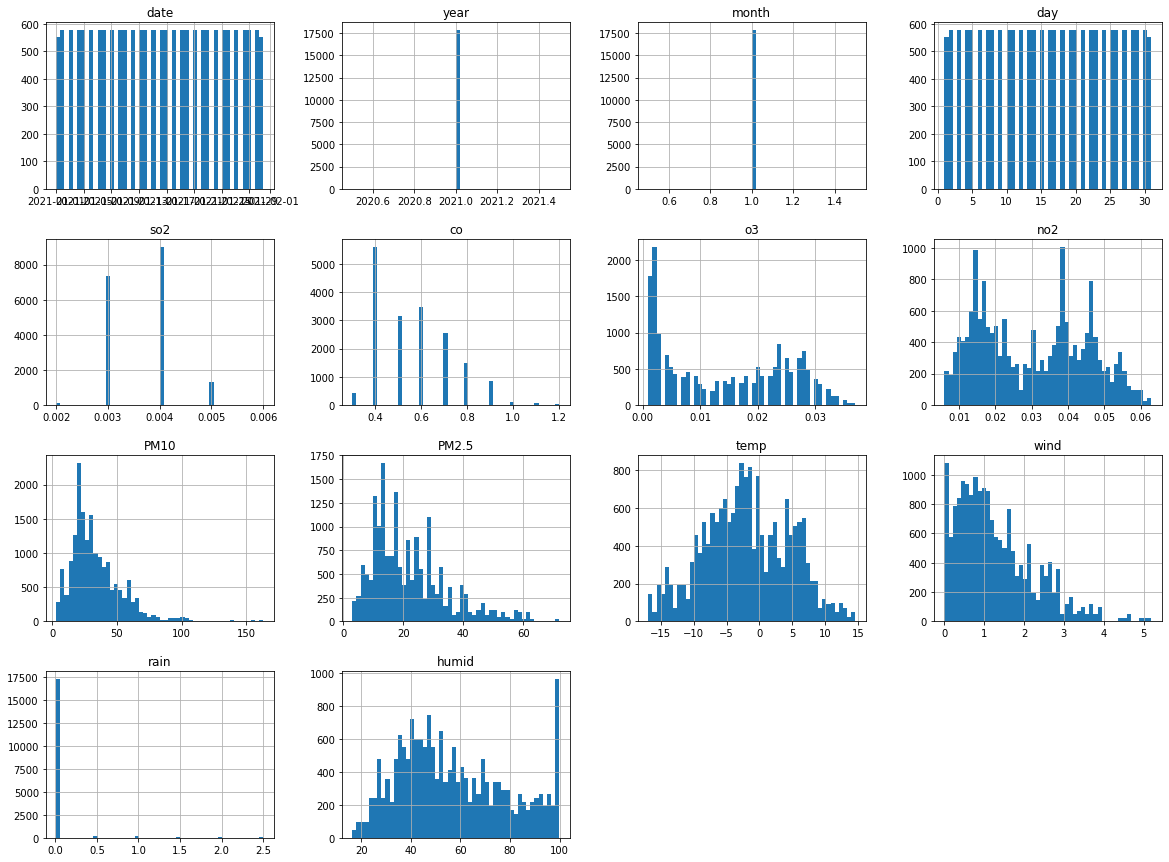

In [39]:
# 히스토그램으로 시각화하기
df.hist(bins=50,figsize=(20,15))
# 그래프상으로 이산화질소(no2), 오존(o3), 미세먼지(pm10), 초미세먼지(pm2.5), 바람(wind)이 연관성이 있어 보인다.

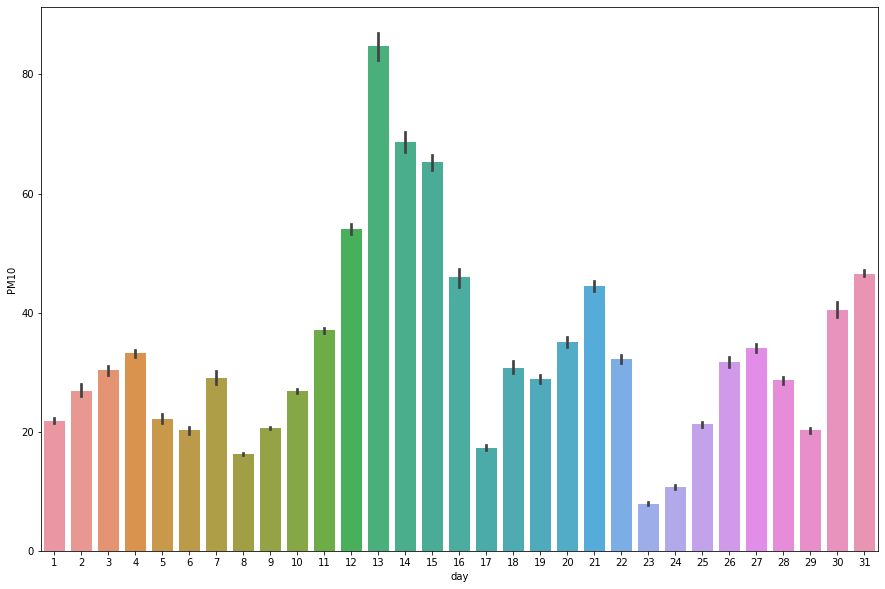

In [40]:
# 막대 그래프로 시각화 : 일별 미세먼지 평균현황
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
dayGraph=sns.barplot(x='day',y='PM10',data=df)
plt.xticks(rotation=0)
plt.show()

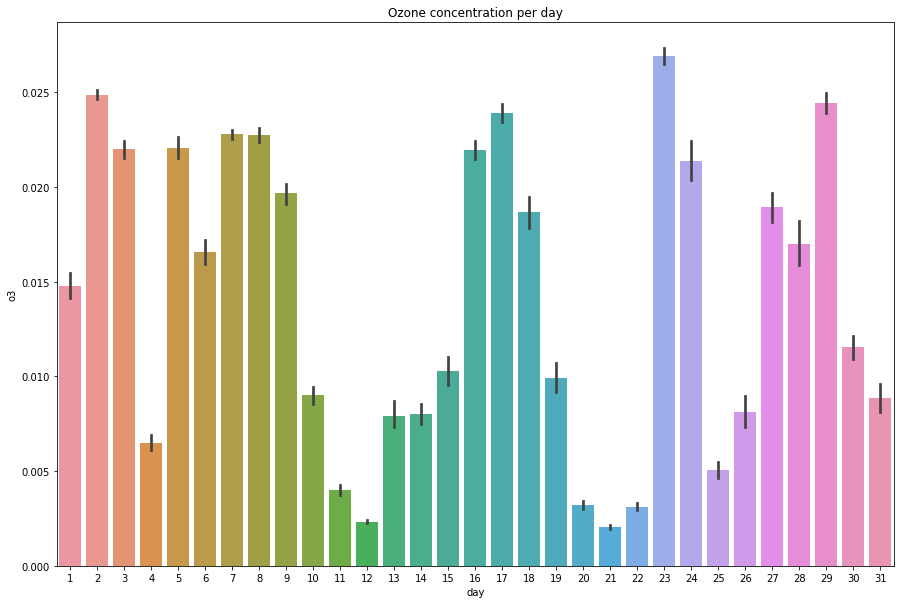

In [42]:
# 연습문제2 : 일별 오존(o3) 농도
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
dayGraph=sns.barplot(x='day',y='o3',data=df)
plt.xticks(rotation=0)
plt.title('Ozone concentration per day')
plt.show()

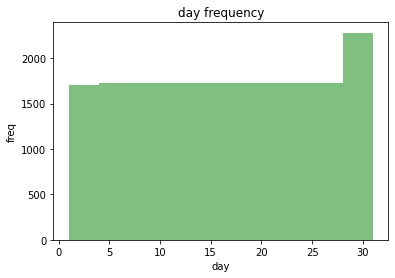

In [43]:
day=df['day']
plt.hist(day,facecolor='g',alpha=0.5)
plt.title('day frequency')
plt.xlabel('day')
plt.ylabel('freq')
plt.show()

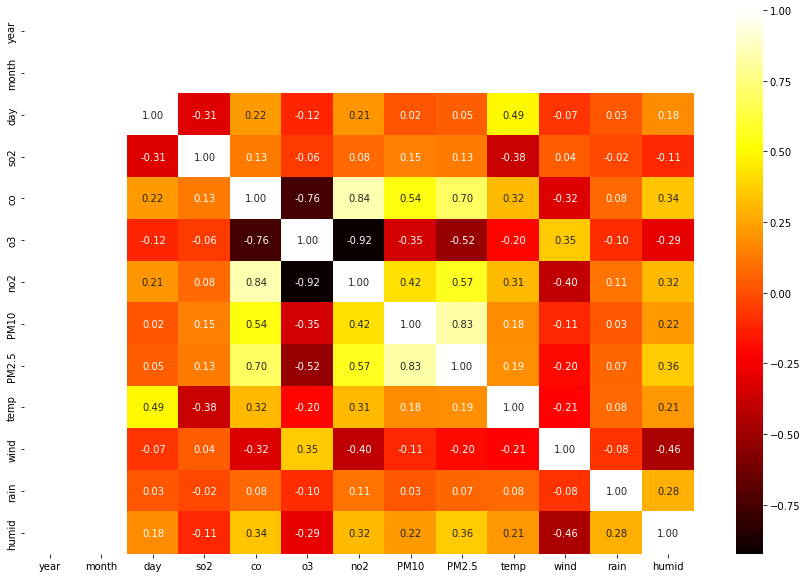

In [44]:
# 히트맵 그래프로 시각화 : 각 변수간의 상관관계를 히트맵으로 출력
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(data=corr, annot=True, fmt='.2f',cmap='hot')



*   so2와 co,no2,pm10,pm2.5 : 이들은 모두 대기 오염물질이기에 관련성이 있다.
*   o3와 wind, temp : 기온이 높을수록 오존이 생긴다는 
바람과 오존이 약한 관계성



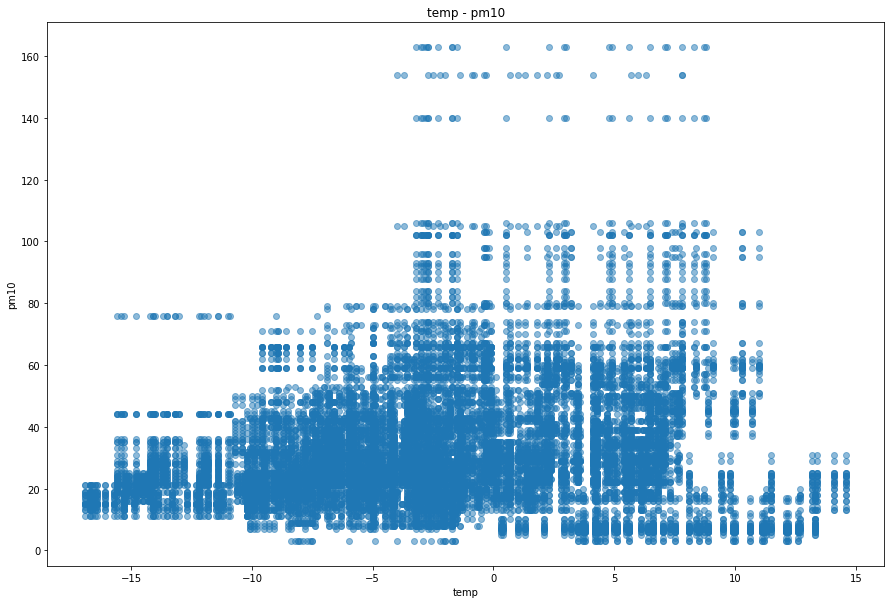

In [45]:
# 산점도 그래프로 시각화1 : 온도와 미세먼지 상관관계
plt.figure(figsize=(15,10))
x=df['temp'] #온도
y=df['PM10'] #미세먼지
plt.plot(x,y,marker='o',linestyle='none',alpha=0.5)
plt.title('temp - pm10')
plt.xlabel('temp')
plt.ylabel('pm10')
plt.show()

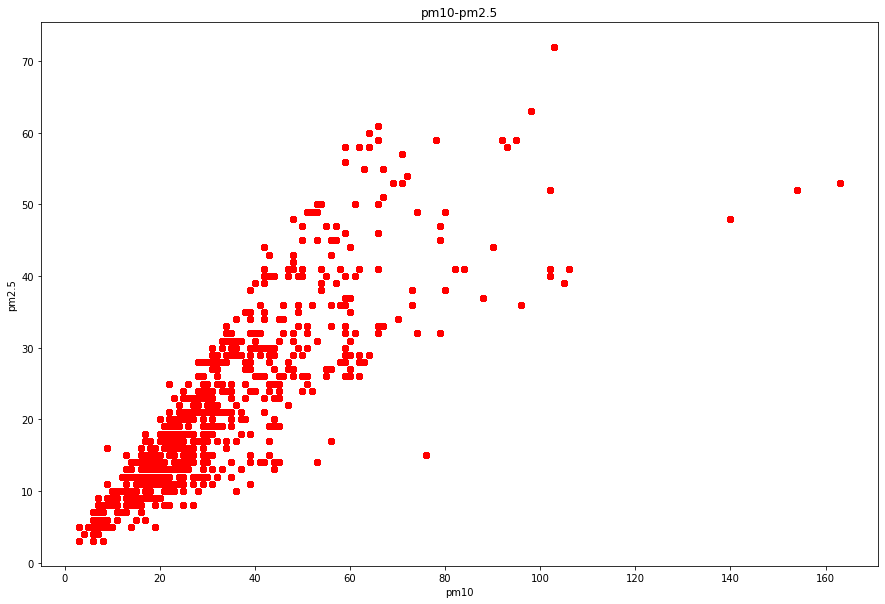

In [46]:
# 산점도 그래프로 시각화2 : # 미세먼지와 초미세먼지의 상관관계
# 산점도로 미세먼지와 초미세먼지가 선형성을 가짐을 확인할 수 있다.

plt.figure(figsize=(15,10))
x=df['PM10'] #미세먼지
y=df['PM2.5']#초미세먼지
plt.plot(x,y,marker='o',linestyle='none',color='red',alpha=0.5)
plt.title('pm10-pm2.5')
plt.xlabel('pm10')
plt.ylabel('pm2.5')
plt.show()

In [63]:
df

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5,temp,wind,rain,humid
0,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-7.2,0.6,0.01,57.5
1,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-7.6,0.7,0.01,57.5
2,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-8.2,0.6,0.01,62.0
3,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-8.1,0.5,0.01,60.5
4,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-8.7,1.3,0.01,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17803,2021-01-31,2021,1,31,0.003,0.6,0.006,0.049,45.0,24.0,7.4,0.6,0.01,51.0
17804,2021-01-31,2021,1,31,0.003,0.6,0.006,0.049,45.0,24.0,6.5,1.0,0.01,59.4
17805,2021-01-31,2021,1,31,0.003,0.6,0.006,0.049,45.0,24.0,7.7,1.0,0.01,60.3
17806,2021-01-31,2021,1,31,0.003,0.6,0.006,0.049,45.0,24.0,6.8,0.6,0.01,63.7


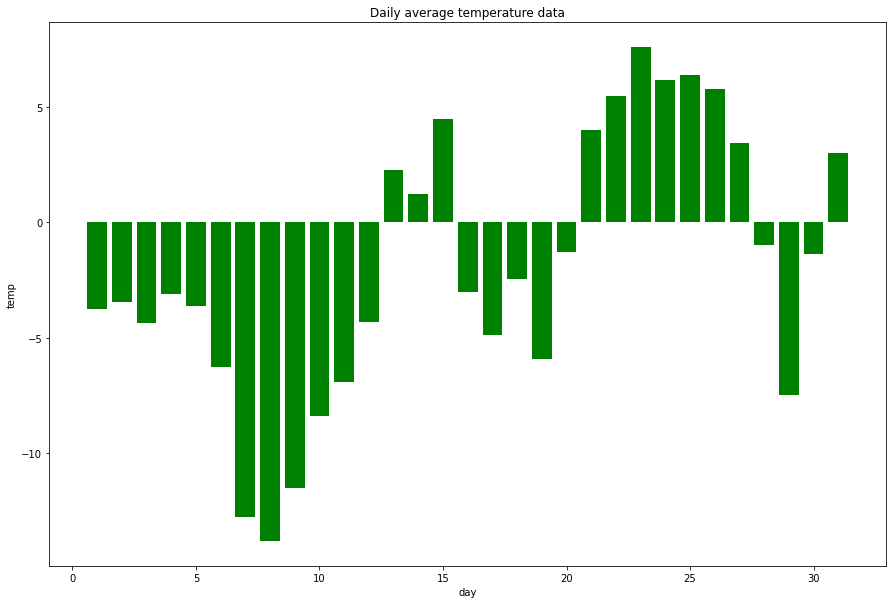

In [92]:
# 연습문제3 : 본문에서 사용된 데이터를 가지고 일별 평균 기온(temp) 데이터를 세로 막대그래프로 나타내보시오.
plt.figure(figsize=(15,10))
m=df.groupby('day')['temp'].mean()
x=pd.DataFrame(m)
plt.title('Daily average temperature data')
plt.bar(x.index,m,color='g')
plt.xlabel('day')
plt.ylabel('temp')
plt.show()